1124
1051
1114
1119
[[8.361400e+01 0.000000e+00 1.114730e+02 ... 0.000000e+00 9.058700e+01
  0.000000e+00]
 [8.500900e+01 2.812000e+01 1.128640e+02 ... 3.911900e+01 9.198100e+01
  2.257100e+01]
 [8.640400e+01 1.716000e+00 1.142540e+02 ... 2.756200e+01 9.337500e+01
  1.600000e-01]
 ...
 [1.432857e+03 1.507700e+02 1.456581e+03 ... 1.801809e+03 1.438795e+03
  9.051060e+02]
 [1.434045e+03 2.035640e+02 1.457766e+03 ... 2.339418e+03 1.439982e+03
  6.671940e+02]
 [1.435233e+03 2.033750e+02 1.458950e+03 ... 2.707258e+03 1.441169e+03
  4.369360e+02]]
[1. 1. 1. ... 4. 4. 4.]
(1051, 8)
[[-1.77755877 -0.16835234 -1.77748795 ... -0.51821547 -1.77754125
  -0.12855507]
 [-1.77398538 -0.15898284 -1.77391385 ... -0.51056337 -1.77396767
  -0.12150728]
 [-1.77041198 -0.16778057 -1.77034233 ... -0.51282405 -1.77039409
  -0.12850511]
 ...
 [ 1.67862788 -0.11811626  1.67869386 ... -0.16576248  1.67864551
   0.15406418]
 [ 1.68167103 -0.10052547  1.68173865 ... -0.06060044  1.68168843
   0.07977618]
 [ 1.684

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


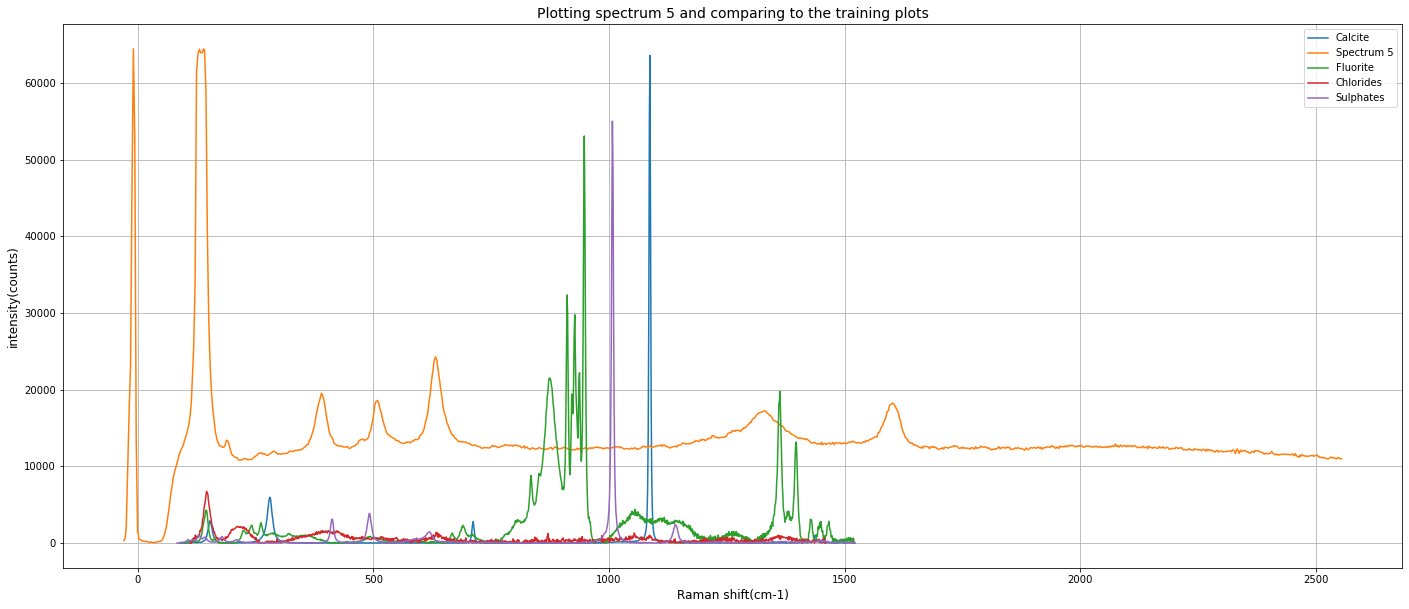

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline




Sulphates = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Gypsum__R040029-3__Raman__514__0__depolarized__Raman_Data_Processed__11459.txt"
scdat = np.recfromtxt(Sulphates, names=['Raman_shift', 'intensity'], skip_header=0, delimiter=',')
Raman = scdat.Raman_shift
intensity = scdat.intensity
a = np.c_[Raman, intensity]
print(len(a[:,0]))



chlorides = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Chlorargyrite__R050360__Raman__514__0__unoriented__Raman_Data_Processed__10820.txt"
scdat2 = np.recfromtxt(chlorides, names=['Raman_shift', 'intensity'], skip_header=0, delimiter=',')
Raman2 = scdat2.Raman_shift
intensity2 = scdat2.intensity
a2 = np.c_[Raman2, intensity2]
print(len(a2))



Fluorite = "https://rruff.info/repository/sample_child_record_raman/by_minerals/Fluorite__R050115-3__Raman__514__0__depolarized__Raman_Data_Processed__5427.txt"
scdat3 = np.recfromtxt(Fluorite, names=['Raman_shift', 'intensity'], skip_header=0, delimiter=',')
Raman3 = scdat3.Raman_shift
intensity3 = scdat3.intensity
a3 = np.c_[Raman3, intensity3]
print(len(a3))



calcite = "https://rruff.info/tmp_rruff/Calcite__R040070-3__Raman__514__0__depolarized__Raman_Data_Processed__11617.rruff"
scdat1 = np.recfromtxt(calcite, names=['Raman_shift', 'intensity'], skip_header=0, delimiter=',')
Raman1 = scdat1.Raman_shift
intensity1 = scdat1.intensity
b = np.c_[Raman1, intensity1]
print(len(b))



spectrum1 = "F:\Physics\JPL ICEE2 Project\TeamZeus_RamanSpectra\spectrum5.xy.xy"
scdat = np.recfromtxt(spectrum1, names=['Raman_shift', 'intensity'], skip_header=0)
Raman5 = scdat.Raman_shift
intensity5 = scdat.intensity
e = np.c_[Raman5, intensity5]



E = e[:len(a2)]


#Organising Raman data into a array.
d = np.c_[a[:len(a2)], a2, a3[:len(a2)] , b[:len(a2)]]
print(d)



#Defining a class for each Raman spectrum.
t = np.ones(len(a2))
t[len(a2)//4: len(a2)//2] = 2
t[len(a2)//2: 3*len(a2)//4] = 3
t[3*len(a2)//4: len(a2)] = 4
print(t)



#scaling the Raman array so the mean is 0 and the standard deviation is 1.
scaler = StandardScaler()
X = d
scaler.fit(X)
X = scaler.transform(X)
print(X.shape)
print(X)
y = t
#plt.plot(Raman, intensity)
plt.figure(figsize=(24,10))
plt.plot(Raman1, intensity1, label = 'Calcite')
plt.plot(Raman5[:len(a2)], intensity5[:len(a2)], label = 'Spectrum 5')
plt.plot(Raman3, intensity3, label = 'Fluorite')
plt.plot(Raman2, intensity2, label = 'Chlorides')
plt.plot(Raman, intensity, label = 'Sulphates')
plt.legend()
plt.grid()
plt.xlabel('Raman shift(cm-1)', size= 12)
plt.ylabel('intensity(counts)', size= 12)
plt.title('Plotting spectrum 5 and comparing to the training plots', size = 14)
#Making a function of kNN algorithm.
def knn(k, E):
    n_neighbors = k

# Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'red'])
    cmap_bold = ListedColormap(['yellow', 'c', 'darkblue', 'darkred'])



# we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)



# Plot the decision boundary for Z array at each position on the grid.
    F = np.c_[E, E, E, E]
    print(F)
    Z = clf.predict(F)



# Put the result into a color plot



# Plot the test points

#plot the prediction grid



#This calculates the percentage of each class in the Z array.(Also the prediction percentage)
    b1 = np.count_nonzero(Z==1)
    b2 = np.count_nonzero(Z==2)
    b3 = np.count_nonzero(Z==3)
    b4 = np.count_nonzero(Z==4)
    b5 = b1+b2+b3+b4
    Sulphates = 100*b1/b5
    print('Sulphates:', Sulphates)
    Chlorides = 100*b2/b5
    print('Chlorides:', Chlorides)
    Fluorite = 100*b3/b5
    print('Fluorite:', Fluorite)
    Calcite = 100*b4/b5
    print('Calcite:', Calcite)
    print(classification_report(y , Z))
    return
knn(500, e[:len(a2)])
#knn(50, b[:len(a2)])
#knn(500)

2733
10141
2733
2733
[[  50.5014 2254.5      50.332  ... 2214.       50.435  1532.09  ]
 [  52.3454 2379.5      50.8595 ... 2202.       52.279  1510.98  ]
 [  54.1912 2370.       51.3849 ... 2224.       54.1248 1503.31  ]
 ...
 [3997.43   1362.     1360.11   ... 2404.     3997.38   1657.08  ]
 [3998.56   1335.     1360.55   ... 2364.     3998.51   1656.57  ]
 [3999.69   1339.5    1360.98   ... 2426.     3999.64   1648.12  ]]
[1. 1. 1. ... 4. 4. 4.]
(2733, 8)
[[-1.87939108 -0.2711835  -1.78475315 ... -0.83458    -1.87939307
  -1.20091791]
 [-1.87776758 -0.22970312 -1.78335821 ... -0.84352256 -1.87776958
  -1.21881616]
 [-1.8761425  -0.23285563 -1.78196881 ... -0.82712787 -1.8761445
  -1.22531923]
 ...
 [ 1.59556852 -0.56735338  1.67888479 ... -0.69298946  1.59556779
  -1.0949443 ]
 [ 1.5965634  -0.57631314  1.68004835 ... -0.722798    1.59656266
  -1.0953767 ]
 [ 1.59755827 -0.57481985  1.68118546 ... -0.67659477  1.59755753
  -1.10254109]]
[[ -29  318  -29 ...  318  -29  318]
 [ -26  7

ValueError: Found input variables with inconsistent numbers of samples: [2733, 2048]

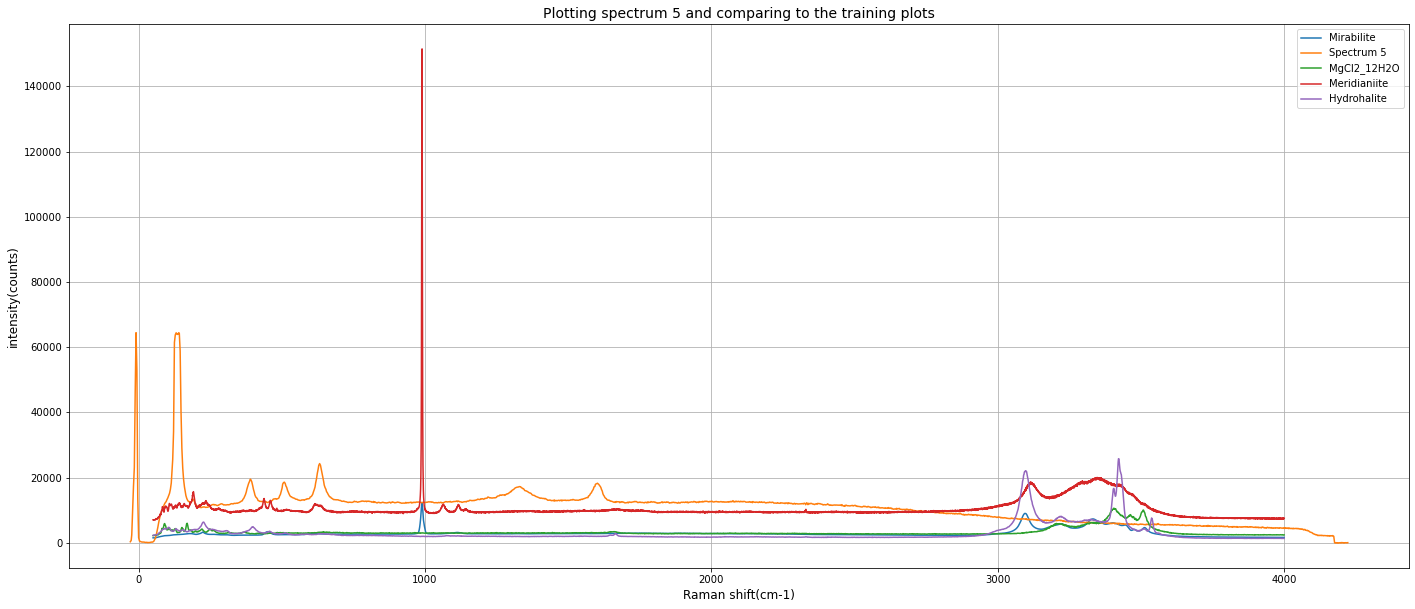

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

#CHANGE ALL a's to e


Hydrohalite = "F:\Physics\JPL ICEE2 Project\Tuan Vu RS data at 100K\hydrohalite_100K.txt"
scdat = np.recfromtxt(Hydrohalite, names=['Raman_shift', 'intensity'], skip_header=0, delimiter='')
Raman = scdat.Raman_shift
intensity = scdat.intensity
a = np.c_[Raman, intensity]
print(len(a[:,0]))



Meridianiite = "F:\Physics\JPL ICEE2 Project\Tuan Vu RS data at 100K\meridianiite_100K.txt"
scdat2 = np.recfromtxt(Meridianiite, names=['Raman_shift', 'intensity'], skip_header=0, delimiter='')
Raman2 = scdat2.Raman_shift
intensity2 = scdat2.intensity
a2 = np.c_[Raman2, intensity2]
print(len(a2))



MgCl2_12H2O = "F:\Physics\JPL ICEE2 Project\Tuan Vu RS data at 100K\MgCl2_12H2O_100K.txt"
scdat3 = np.recfromtxt(MgCl2_12H2O, names=['Raman_shift', 'intensity'], skip_header=0, delimiter='')
Raman3 = scdat3.Raman_shift
intensity3 = scdat3.intensity
a3 = np.c_[Raman3, intensity3]
print(len(a3))



Mirabilite = "F:\Physics\JPL ICEE2 Project\Tuan Vu RS data at 100K\mirabilite_100K.txt"
scdat1 = np.recfromtxt(Mirabilite, names=['Raman_shift', 'intensity'], skip_header=0, delimiter='')
Raman1 = scdat1.Raman_shift
intensity1 = scdat1.intensity
b = np.c_[Raman1, intensity1]
print(len(b))



spectrum5 = "F:\Physics\JPL ICEE2 Project\TeamZeus_RamanSpectra\spectrum5.xy.xy"
scdat = np.recfromtxt(spectrum5, names=['Raman_shift', 'intensity'], skip_header=0)
Raman5 = scdat.Raman_shift
intensity5 = scdat.intensity
e = np.c_[Raman5, intensity5]



E = e[:len(a)]


#Organising Raman data into a array.
d = np.c_[a[:len(a)], a2[:len(a)], a3[:len(a)] , b[:len(a)]]
print(d)



#Defining a class for each Raman spectrum.
t = np.ones(len(a))
t[len(a)//4: len(a)//2] = 2
t[len(a)//2: 3*len(a)//4] = 3
t[3*len(a)//4: len(a)] = 4
print(t)



#scaling the Raman array so the mean is 0 and the standard deviation is 1.
scaler = StandardScaler()
X = d
scaler.fit(X)
X = scaler.transform(X)
print(X.shape)
print(X)
y = t
#plt.plot(Raman, intensity)
plt.figure(figsize=(24,10))
plt.plot(Raman1, intensity1, label = 'Mirabilite')
plt.plot(Raman5[:len(a)], intensity5[:len(a)], label = 'Spectrum 5')
plt.plot(Raman3, intensity3, label = 'MgCl2_12H2O')
plt.plot(Raman2, intensity2, label = 'Meridianiite')
plt.plot(Raman, intensity, label = 'Hydrohalite')
plt.legend()
plt.grid()
plt.xlabel('Raman shift(cm-1)', size= 12)
plt.ylabel('intensity(counts)', size= 12)
plt.title('Plotting spectrum 5 and comparing to the training plots', size = 14)
#Making a function of kNN algorithm.
def knn(k, E):
    n_neighbors = k

# Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'red'])
    cmap_bold = ListedColormap(['yellow', 'c', 'darkblue', 'darkred'])



# we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)



# Plot the decision boundary for Z array at each position on the grid.
    F = np.c_[E, E, E, E]
    print(F)
    Z = clf.predict(F)



# Put the result into a color plot



# Plot the test points

#plot the prediction grid



#This calculates the percentage of each class in the Z array.(Also the prediction percentage)
    b1 = np.count_nonzero(Z==1)
    b2 = np.count_nonzero(Z==2)
    b3 = np.count_nonzero(Z==3)
    b4 = np.count_nonzero(Z==4)
    b5 = b1+b2+b3+b4
    Sulphates = 100*b1/b5
    print('Hydrohalite:', Sulphates)
    Chlorides = 100*b2/b5
    print('Meridianiite:', Chlorides)
    Fluorite = 100*b3/b5
    print('MgCl2_12H2O:', Fluorite)
    Calcite = 100*b4/b5
    print('Mirabilite:', Calcite)
    print(classification_report(y , Z))
    return
knn(5, e[:len(a)])
#knn(50, b[:len(a2)])
#knn(500)